In [2]:
                                                           # PROJECT 10 #
                    # Custom-Object Character Recognition(OCR) on AWS (Google Drive/ Cloud Storage)#


In [3]:
# Custom OCR using YOLOv3 + Tesseract OCR #
#  End-to-End Implementation on Google Colab #

#STEP1-Set up environment and Google Drive folders
#STEP2-Install dependencies (OpenCV, Tesseract, etc.)
#STEP3-Set up YOLOv8 (Darknet or Ultralytics)
#STEP4-Run inference, crop detections, and extract text using Tesseract
#STEP5-Save all outputs to Google Drive

In [4]:
import os

# Reset to /content (safe default in Colab)
os.chdir('/content')

# Confirm
print("Current working directory:", os.getcwd())

Current working directory: /content


In [5]:
# STEP 1: ENVIRONMENT SETUP #
!sudo apt-get install -y libgl1-mesa-glx tesseract-ocr
!pip install opencv-python pytesseract matplotlib tqdm pandas ultralytics --quiet

import os
import cv2
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import drive

drive.mount('/content/drive')


print('✅ Environment ready and Drive mounted.')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.9 MB/s eta 0:00:00
Mounted at /content/drive
✅ Environment ready and Drive mounted.


In [6]:

# Define Project Paths #

datasets_dir = '/content/drive/MyDrive/Custom_OCR_Project/datasets'
test_dir = os.path.join(datasets_dir, 'raw')

results_dir = '/content/drive/MyDrive/Custom_OCR_Project/results'
pred_dir = os.path.join(results_dir, 'predictions')
crops_dir = os.path.join(results_dir, 'crops')
ocr_dir = os.path.join(results_dir, 'ocr_texts')

# New Folder Creation #
for path in [pred_dir, crops_dir, ocr_dir]:
    os.makedirs(path, exist_ok=True)


In [7]:
from ultralytics import YOLO

# Official YOLOv8 small model for Speed and Accuracy #
model = YOLO('yolov8n.pt')
print("✅ YOLOv8 model loaded successfully.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ YOLOv8 model loaded successfully.


In [8]:
from tqdm import tqdm

# Run detection and save cropped text boxes #

for img_file in tqdm(os.listdir(test_dir), desc="Running YOLOv8 Inference"):
    if not img_file.lower().endswith(('.jpg', '.png')):
        continue

    img_path = os.path.join(test_dir, img_file)

    results = model.predict(
        source=img_path,
        conf=0.25,          # confidence threshold
        save=True,          # save images with bounding boxes
        save_crop=True,     # save cropped detected boxes
        project=results_dir,
        name='crops',
        exist_ok=True
    )

print("✅ YOLO detection & cropping done! Crops saved in:", crops_dir)


Running YOLOv8 Inference:   0%|          | 0/100 [00:00<?, ?it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_6716.jpg: 448x640 (no detections), 476.8ms
Speed: 23.6ms preprocess, 476.8ms inference, 28.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:   1%|          | 1/100 [00:02<03:23,  2.06s/it]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_6214.jpg: 640x416 1 laptop, 1 book, 453.0ms
Speed: 4.3ms preprocess, 453.0ms inference, 14.7ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:   2%|▏         | 2/100 [00:04<04:09,  2.55s/it]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7083.jpg: 640x416 1 book, 190.6ms
Speed: 4.1ms preprocess, 190.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:   3%|▎         | 3/100 [00:05<02:49,  1.75s/it]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_9076.jpg: 448x640 (no detections), 234.8ms
Speed: 3.6ms preprocess, 234.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:   4%|▍         | 4/100 [00:07<02:33,  1.60s/it]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_1915.jpg: 640x416 1 laptop, 1 book, 224.8ms
Speed: 3.6ms preprocess, 224.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:   5%|▌         | 5/100 [00:07<01:53,  1.20s/it]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_9445.jpg: 640x416 1 laptop, 1 book, 179.7ms
Speed: 4.5ms preprocess, 179.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:   6%|▌         | 6/100 [00:07<01:24,  1.11it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2866.jpg: 448x640 (no detections), 177.7ms
Speed: 3.8ms preprocess, 177.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:   7%|▋         | 7/100 [00:08<01:03,  1.47it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4618.jpg: 448x640 (no detections), 320.8ms
Speed: 2.9ms preprocess, 320.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:   8%|▊         | 8/100 [00:08<00:53,  1.71it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_3333.jpg: 448x640 (no detections), 262.3ms
Speed: 4.2ms preprocess, 262.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:   9%|▉         | 9/100 [00:08<00:45,  1.98it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_9108.jpg: 448x640 1 book, 179.6ms
Speed: 2.9ms preprocess, 179.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  10%|█         | 10/100 [00:09<00:38,  2.33it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8265.jpg: 640x416 1 laptop, 183.1ms
Speed: 3.8ms preprocess, 183.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  11%|█         | 11/100 [00:09<00:35,  2.54it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_912.jpg: 448x640 (no detections), 285.5ms
Speed: 7.1ms preprocess, 285.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  12%|█▏        | 12/100 [00:09<00:33,  2.62it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_9207.jpg: 384x640 1 book, 279.6ms
Speed: 6.7ms preprocess, 279.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  13%|█▎        | 13/100 [00:10<00:33,  2.56it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_1861.jpg: 384x640 1 book, 355.5ms
Speed: 9.3ms preprocess, 355.5ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  14%|█▍        | 14/100 [00:10<00:38,  2.23it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_517.jpg: 448x640 (no detections), 449.0ms
Speed: 15.1ms preprocess, 449.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  15%|█▌        | 15/100 [00:11<00:40,  2.11it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4468.jpg: 448x640 1 book, 305.6ms
Speed: 7.8ms preprocess, 305.6ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  16%|█▌        | 16/100 [00:11<00:37,  2.21it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_9447.jpg: 448x640 (no detections), 277.0ms
Speed: 5.8ms preprocess, 277.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  17%|█▋        | 17/100 [00:12<00:34,  2.40it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5858.jpg: 384x640 1 book, 262.9ms
Speed: 6.6ms preprocess, 262.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  18%|█▊        | 18/100 [00:12<00:33,  2.43it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_838.jpg: 640x416 1 book, 262.8ms
Speed: 5.7ms preprocess, 262.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  19%|█▉        | 19/100 [00:12<00:32,  2.52it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8310.jpg: 640x416 1 laptop, 1 book, 257.4ms
Speed: 5.7ms preprocess, 257.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  20%|██        | 20/100 [00:13<00:31,  2.53it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7219.jpg: 448x640 1 book, 282.5ms
Speed: 4.5ms preprocess, 282.5ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  21%|██        | 21/100 [00:13<00:30,  2.56it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_1374.jpg: 384x640 1 book, 265.9ms
Speed: 4.4ms preprocess, 265.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  22%|██▏       | 22/100 [00:13<00:29,  2.60it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_3414.jpg: 640x416 1 book, 286.6ms
Speed: 5.7ms preprocess, 286.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  23%|██▎       | 23/100 [00:14<00:29,  2.58it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_6743.jpg: 448x640 1 book, 321.6ms
Speed: 6.5ms preprocess, 321.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  24%|██▍       | 24/100 [00:14<00:31,  2.41it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2987.jpg: 640x416 1 laptop, 1 book, 216.9ms
Speed: 3.3ms preprocess, 216.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  25%|██▌       | 25/100 [00:15<00:30,  2.45it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2505.jpg: 448x640 1 book, 223.3ms
Speed: 5.1ms preprocess, 223.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  26%|██▌       | 26/100 [00:15<00:28,  2.60it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4670.jpg: 448x640 1 book, 192.8ms
Speed: 4.4ms preprocess, 192.8ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  27%|██▋       | 27/100 [00:15<00:25,  2.82it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_640.jpg: 448x640 1 book, 204.8ms
Speed: 4.4ms preprocess, 204.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  28%|██▊       | 28/100 [00:16<00:24,  2.94it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_3439.jpg: 448x640 (no detections), 185.8ms
Speed: 3.7ms preprocess, 185.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  29%|██▉       | 29/100 [00:16<00:22,  3.13it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_9575.jpg: 448x640 (no detections), 227.4ms
Speed: 5.5ms preprocess, 227.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  30%|███       | 30/100 [00:16<00:21,  3.21it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5074.jpg: 448x640 (no detections), 412.2ms
Speed: 6.3ms preprocess, 412.2ms inference, 3.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  31%|███       | 31/100 [00:17<00:25,  2.74it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4557.jpg: 640x416 1 laptop, 384.0ms
Speed: 7.3ms preprocess, 384.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  32%|███▏      | 32/100 [00:17<00:28,  2.37it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_6185.jpg: 640x416 1 laptop, 1 book, 318.8ms
Speed: 11.7ms preprocess, 318.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  33%|███▎      | 33/100 [00:18<00:29,  2.27it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_36.jpg: 640x416 1 laptop, 1 book, 264.4ms
Speed: 6.1ms preprocess, 264.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  34%|███▍      | 34/100 [00:18<00:28,  2.33it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4979.jpg: 384x640 1 book, 233.0ms
Speed: 5.3ms preprocess, 233.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  35%|███▌      | 35/100 [00:18<00:26,  2.47it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5640.jpg: 384x640 1 book, 271.4ms
Speed: 3.8ms preprocess, 271.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  36%|███▌      | 36/100 [00:19<00:25,  2.47it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_1248.jpg: 448x640 1 book, 295.4ms
Speed: 8.4ms preprocess, 295.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  37%|███▋      | 37/100 [00:19<00:25,  2.49it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_511.jpg: 448x640 (no detections), 240.8ms
Speed: 7.5ms preprocess, 240.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  38%|███▊      | 38/100 [00:20<00:23,  2.68it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8394.jpg: 448x640 (no detections), 189.0ms
Speed: 4.3ms preprocess, 189.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  39%|███▉      | 39/100 [00:20<00:20,  3.01it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_6884.jpg: 448x640 1 book, 180.4ms
Speed: 3.4ms preprocess, 180.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  40%|████      | 40/100 [00:20<00:18,  3.22it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8491.jpg: 640x416 1 laptop, 1 book, 184.7ms
Speed: 2.8ms preprocess, 184.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  41%|████      | 41/100 [00:20<00:19,  3.09it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7805.jpg: 448x640 (no detections), 181.8ms
Speed: 4.8ms preprocess, 181.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  42%|████▏     | 42/100 [00:21<00:17,  3.37it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8214.jpg: 448x640 (no detections), 217.2ms
Speed: 4.3ms preprocess, 217.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  43%|████▎     | 43/100 [00:21<00:16,  3.45it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5357.jpg: 640x416 1 laptop, 1 book, 179.3ms
Speed: 4.1ms preprocess, 179.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  44%|████▍     | 44/100 [00:21<00:16,  3.40it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_657.jpg: 384x640 1 book, 167.6ms
Speed: 2.6ms preprocess, 167.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  45%|████▌     | 45/100 [00:22<00:15,  3.51it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_1174.jpg: 448x640 1 book, 200.2ms
Speed: 5.7ms preprocess, 200.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  46%|████▌     | 46/100 [00:22<00:16,  3.34it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_9691.jpg: 448x640 1 book, 198.9ms
Speed: 6.6ms preprocess, 198.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  47%|████▋     | 47/100 [00:22<00:15,  3.35it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2737.jpg: 384x640 1 book, 157.6ms
Speed: 4.1ms preprocess, 157.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  48%|████▊     | 48/100 [00:22<00:14,  3.50it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5928.jpg: 640x416 1 laptop, 1 book, 175.0ms
Speed: 3.1ms preprocess, 175.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  49%|████▉     | 49/100 [00:23<00:14,  3.49it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2649.jpg: 384x640 1 book, 153.7ms
Speed: 3.0ms preprocess, 153.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  50%|█████     | 50/100 [00:23<00:13,  3.59it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_9833.jpg: 448x640 1 book, 177.9ms
Speed: 3.7ms preprocess, 177.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  51%|█████     | 51/100 [00:23<00:13,  3.64it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_3558.jpg: 384x640 1 book, 160.1ms
Speed: 2.6ms preprocess, 160.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  52%|█████▏    | 52/100 [00:23<00:13,  3.65it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_9047.jpg: 384x640 1 book, 158.0ms
Speed: 8.0ms preprocess, 158.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  53%|█████▎    | 53/100 [00:24<00:12,  3.62it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8748.jpg: 448x640 (no detections), 195.3ms
Speed: 3.4ms preprocess, 195.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  54%|█████▍    | 54/100 [00:24<00:12,  3.71it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7075.jpg: 448x640 (no detections), 199.5ms
Speed: 4.3ms preprocess, 199.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  55%|█████▌    | 55/100 [00:24<00:12,  3.69it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_1001.jpg: 640x416 1 book, 374.7ms
Speed: 4.9ms preprocess, 374.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  56%|█████▌    | 56/100 [00:25<00:15,  2.81it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7758.jpg: 448x640 1 book, 316.4ms
Speed: 7.9ms preprocess, 316.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  57%|█████▋    | 57/100 [00:25<00:16,  2.64it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5879.jpg: 448x640 (no detections), 290.3ms
Speed: 14.6ms preprocess, 290.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  58%|█████▊    | 58/100 [00:26<00:15,  2.63it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4385.jpg: 448x640 (no detections), 286.9ms
Speed: 9.2ms preprocess, 286.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  59%|█████▉    | 59/100 [00:26<00:15,  2.69it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5338.jpg: 448x640 (no detections), 339.4ms
Speed: 6.4ms preprocess, 339.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  60%|██████    | 60/100 [00:26<00:15,  2.53it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7635.jpg: 384x640 1 book, 405.7ms
Speed: 7.0ms preprocess, 405.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  61%|██████    | 61/100 [00:27<00:17,  2.28it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_123.jpg: 448x640 1 book, 322.6ms
Speed: 7.2ms preprocess, 322.6ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  62%|██████▏   | 62/100 [00:27<00:16,  2.29it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_6723.jpg: 448x640 1 book, 285.9ms
Speed: 4.6ms preprocess, 285.9ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  63%|██████▎   | 63/100 [00:28<00:15,  2.37it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_1711.jpg: 448x640 (no detections), 309.1ms
Speed: 12.0ms preprocess, 309.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  64%|██████▍   | 64/100 [00:28<00:14,  2.46it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_757.jpg: 448x640 (no detections), 305.8ms
Speed: 8.6ms preprocess, 305.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  65%|██████▌   | 65/100 [00:29<00:13,  2.54it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_3804.jpg: 448x640 (no detections), 302.1ms
Speed: 6.1ms preprocess, 302.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  66%|██████▌   | 66/100 [00:29<00:13,  2.56it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_532.jpg: 640x416 1 book, 297.0ms
Speed: 7.2ms preprocess, 297.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  67%|██████▋   | 67/100 [00:29<00:13,  2.52it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_6698.jpg: 640x416 1 laptop, 1 book, 298.2ms
Speed: 10.0ms preprocess, 298.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  68%|██████▊   | 68/100 [00:30<00:13,  2.44it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4046.jpg: 640x416 1 book, 173.2ms
Speed: 6.5ms preprocess, 173.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  69%|██████▉   | 69/100 [00:30<00:11,  2.73it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_3753.jpg: 640x416 1 laptop, 168.3ms
Speed: 4.0ms preprocess, 168.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  70%|███████   | 70/100 [00:30<00:10,  2.99it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8749.jpg: 448x640 (no detections), 194.6ms
Speed: 3.0ms preprocess, 194.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  71%|███████   | 71/100 [00:31<00:08,  3.23it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_122.jpg: 448x640 (no detections), 253.9ms
Speed: 3.0ms preprocess, 253.9ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  72%|███████▏  | 72/100 [00:31<00:09,  2.98it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4683.jpg: 448x640 (no detections), 434.3ms
Speed: 15.2ms preprocess, 434.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  73%|███████▎  | 73/100 [00:31<00:10,  2.55it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5816.jpg: 384x640 1 book, 390.0ms
Speed: 4.2ms preprocess, 390.0ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  74%|███████▍  | 74/100 [00:32<00:11,  2.25it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4748.jpg: 640x416 1 laptop, 1 book, 444.7ms
Speed: 8.9ms preprocess, 444.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  75%|███████▌  | 75/100 [00:33<00:13,  1.91it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2300.jpg: 384x640 1 book, 420.0ms
Speed: 15.5ms preprocess, 420.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  76%|███████▌  | 76/100 [00:33<00:13,  1.81it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_3813.jpg: 384x640 1 book, 488.0ms
Speed: 10.9ms preprocess, 488.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  77%|███████▋  | 77/100 [00:34<00:13,  1.65it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8302.jpg: 384x640 1 book, 486.2ms
Speed: 4.3ms preprocess, 486.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  78%|███████▊  | 78/100 [00:35<00:14,  1.54it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2838.jpg: 640x416 1 laptop, 1 book, 407.6ms
Speed: 4.8ms preprocess, 407.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  79%|███████▉  | 79/100 [00:35<00:13,  1.59it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_447.jpg: 448x640 (no detections), 410.5ms
Speed: 5.8ms preprocess, 410.5ms inference, 3.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  80%|████████  | 80/100 [00:36<00:12,  1.66it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7601.jpg: 448x640 1 book, 382.3ms
Speed: 8.7ms preprocess, 382.3ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  81%|████████  | 81/100 [00:37<00:11,  1.71it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2177.jpg: 448x640 (no detections), 388.4ms
Speed: 11.3ms preprocess, 388.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  82%|████████▏ | 82/100 [00:37<00:10,  1.70it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2691.jpg: 448x640 1 book, 718.4ms
Speed: 19.3ms preprocess, 718.4ms inference, 3.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  83%|████████▎ | 83/100 [00:38<00:11,  1.45it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4498.jpg: 448x640 (no detections), 327.8ms
Speed: 6.1ms preprocess, 327.8ms inference, 3.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  84%|████████▍ | 84/100 [00:38<00:09,  1.64it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7109.jpg: 384x640 1 book, 347.2ms
Speed: 3.8ms preprocess, 347.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  85%|████████▌ | 85/100 [00:39<00:08,  1.74it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5896.jpg: 640x416 1 laptop, 1 book, 304.9ms
Speed: 5.6ms preprocess, 304.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  86%|████████▌ | 86/100 [00:39<00:07,  1.82it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8231.jpg: 640x416 1 book, 533.7ms
Speed: 4.0ms preprocess, 533.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  87%|████████▋ | 87/100 [00:40<00:07,  1.64it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7791.jpg: 384x640 1 book, 242.9ms
Speed: 6.0ms preprocess, 242.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  88%|████████▊ | 88/100 [00:41<00:06,  1.88it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4523.jpg: 640x416 1 laptop, 1 book, 272.7ms
Speed: 5.4ms preprocess, 272.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  89%|████████▉ | 89/100 [00:41<00:05,  2.02it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2841.jpg: 384x640 1 book, 260.0ms
Speed: 5.3ms preprocess, 260.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  90%|█████████ | 90/100 [00:41<00:04,  2.17it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7082.jpg: 448x640 1 book, 298.0ms
Speed: 5.6ms preprocess, 298.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  91%|█████████ | 91/100 [00:42<00:03,  2.26it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_2885.jpg: 448x640 (no detections), 282.9ms
Speed: 6.4ms preprocess, 282.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  92%|█████████▏| 92/100 [00:42<00:03,  2.43it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_1433.jpg: 448x640 1 book, 274.1ms
Speed: 6.5ms preprocess, 274.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  93%|█████████▎| 93/100 [00:42<00:02,  2.47it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_421.jpg: 384x640 1 book, 227.2ms
Speed: 7.3ms preprocess, 227.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  94%|█████████▍| 94/100 [00:43<00:02,  2.63it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5503.jpg: 640x416 1 laptop, 1 book, 258.5ms
Speed: 6.7ms preprocess, 258.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  95%|█████████▌| 95/100 [00:43<00:01,  2.59it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_5608.jpg: 640x416 1 laptop, 1 book, 277.5ms
Speed: 4.6ms preprocess, 277.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  96%|█████████▌| 96/100 [00:44<00:01,  2.51it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_4790.jpg: 448x640 (no detections), 311.4ms
Speed: 9.0ms preprocess, 311.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  97%|█████████▋| 97/100 [00:44<00:01,  2.56it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_8251.jpg: 384x640 1 book, 243.0ms
Speed: 3.8ms preprocess, 243.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  98%|█████████▊| 98/100 [00:44<00:00,  2.66it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_6222.jpg: 640x416 1 laptop, 292.3ms
Speed: 5.5ms preprocess, 292.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference:  99%|█████████▉| 99/100 [00:45<00:00,  2.53it/s]


image 1/1 /content/drive/MyDrive/Custom_OCR_Project/datasets/raw/thyrocare_0_7571.jpg: 448x640 1 book, 182.8ms
Speed: 4.4ms preprocess, 182.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/Custom_OCR_Project/results/crops


Running YOLOv8 Inference: 100%|██████████| 100/100 [00:45<00:00,  2.20it/s]

✅ YOLO detection & cropping done! Crops saved in: /content/drive/MyDrive/Custom_OCR_Project/results/crops


In [9]:
#  Run OCR on cropped boxes #
import pytesseract
import cv2

ocr_config = '--psm 6'  # Assume single block of text

for crop_file in tqdm(os.listdir(crops_dir), desc="Running OCR"):
    if not crop_file.lower().endswith(('.jpg', '.png')):
        continue

    crop_path = os.path.join(crops_dir, crop_file)
    img = cv2.imread(crop_path)
    if img is None:
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray, config=ocr_config)

    # Save OCR text
    text_file = os.path.join(ocr_dir, os.path.splitext(crop_file)[0] + '.txt')
    with open(text_file, 'w', encoding='utf-8') as f:
        f.write(text.strip())

print(f"✅ OCR complete! Text files saved in {ocr_dir}")


Running OCR: 100%|██████████| 101/101 [09:10<00:00,  5.45s/it]

✅ OCR complete! Text files saved in /content/drive/MyDrive/Custom_OCR_Project/results/ocr_texts


In [10]:
#  Merge OCR results per lab report #


merged_dir = os.path.join(results_dir, 'merged_reports')
os.makedirs(merged_dir, exist_ok=True)

from collections import defaultdict

report_texts = defaultdict(list)

for crop_file in os.listdir(crops_dir):
    if not crop_file.lower().endswith(('.jpg', '.png')):
        continue

    # Assumes YOLO crops saved as: <reportname>_crop<number>.jpg
    report_name = crop_file.split('_crop')[0]
    text_file = os.path.join(ocr_dir, os.path.splitext(crop_file)[0] + '.txt')

    with open(text_file, 'r', encoding='utf-8') as f:
        text = f.read().strip()
        if text:
            report_texts[report_name].append(text)

# Save one merged text file per lab report
for report_name, texts in report_texts.items():
    merged_path = os.path.join(merged_dir, report_name + '.txt')
    with open(merged_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(texts))

print(f"✅ All OCR crops merged! Merged text files saved in {merged_dir}")

✅ All OCR crops merged! Merged text files saved in /content/drive/MyDrive/Custom_OCR_Project/results/merged_reports


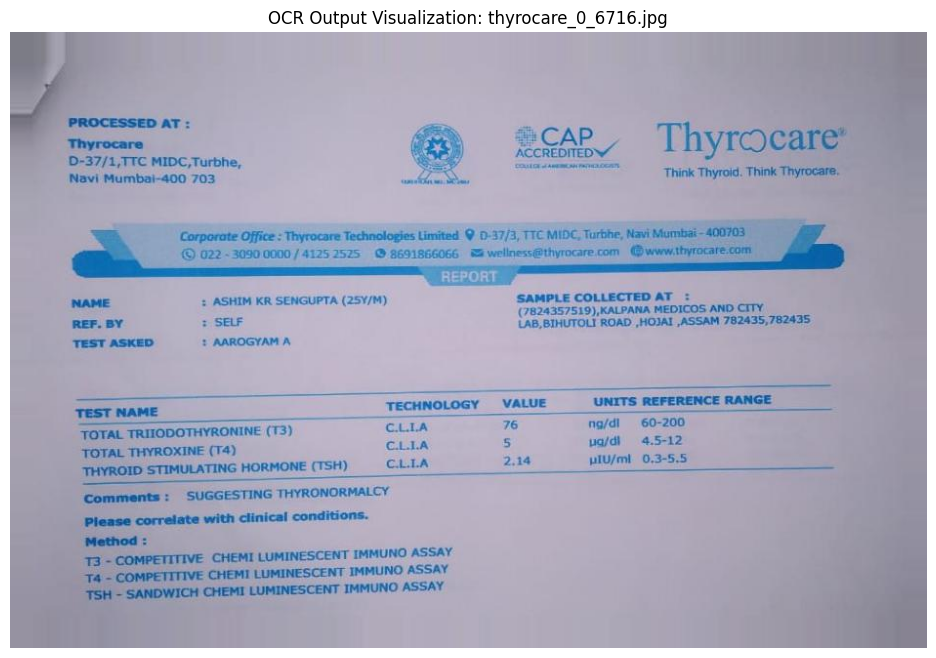

In [11]:
import cv2
import matplotlib.pyplot as plt
import os

#  folder containing test images #
test_dir = '/content/drive/MyDrive/Custom_OCR_Project/datasets/raw'

# all images in the folder #
image_files = [f for f in os.listdir(test_dir) if f.lower().endswith(('.jpg', '.png'))]

if len(image_files) == 0:
    raise FileNotFoundError(f"No images found in {test_dir}")

# Pick the first image (or loop over all)
image_path = os.path.join(test_dir, image_files[0])

# Load image
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Failed to load image: {image_path}")

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"OCR Output Visualization: {image_files[0]}")
plt.show()



